### SAM BraTS


In [1]:
## installing dependencies

In [4]:
pip install torch torchvision nibabel opencv-python matplotlib scikit-learn segment-anything

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor
import torch

# --- 1. Download Test Image (with verification) ---
!wget -O Brains.png https://github.com/facebookresearch/segment-anything/raw/main/notebooks/images/dog.jpg
!ls -lh Brains.png  # Verify file exists and has size > 0

--2025-07-11 14:20:48--  https://github.com/facebookresearch/segment-anything/raw/main/notebooks/images/dog.jpg
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg [following]
--2025-07-11 14:20:49--  https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99846 (98K) [image/jpeg]
Saving to: ‘Brains.png’

Brains.png          100%[===================>]  97.51K  --.-KB/s    in 0.002s  

2025-07-11 14:20:50 (50.0 MB/s) - ‘Brains.png’ saved [99846/

In [9]:
# --- 2. Load Image ---
image = cv2.imread("Brains.png")
if image is None:
    raise FileNotFoundError("Image failed to load. Possible causes: 1) Download failed, 2) Path is incorrect, 3) File is corrupted.")

# Convert BGR to RGB (OpenCV loads in BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("Image shape:", image_rgb.shape)  # Should print (H, W, 3)

Image shape: (534, 800, 3)


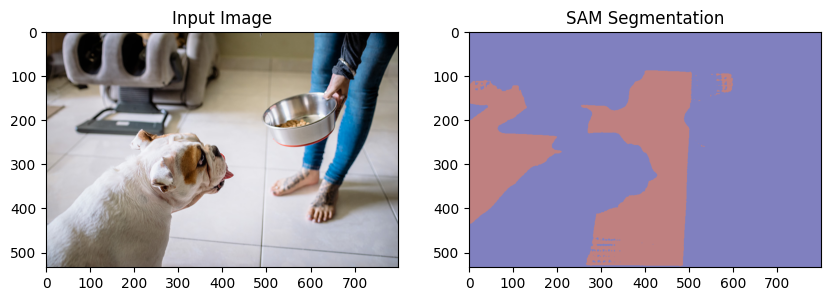

In [10]:
# --- 3. Initialize SAM ---
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device)
predictor = SamPredictor(sam)

# --- 4. Generate Masks ---
predictor.set_image(image_rgb)
input_point = np.array([[image.shape[1] // 2, image.shape[0] // 2]])  # Center point
input_label = np.array([1])  # Foreground

masks, scores, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

# --- 5. Visualize ---
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Input Image")
plt.subplot(1, 2, 2)
plt.imshow(masks[0], cmap='jet', alpha=0.5)
plt.title("SAM Segmentation")
plt.show()

In [16]:
!pip install -q torch torchvision numpy opencv-python matplotlib scikit-learn scipy nibabel
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

import torch
import numpy as np
import cv2
from segment_anything import sam_model_registry, SamPredictor

# Initialize SAM
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device)
for param in sam.parameters():
    param.requires_grad = False

predictor = SamPredictor(sam)
print("SAM initialized successfully!")

SAM initialized successfully!


### improvement

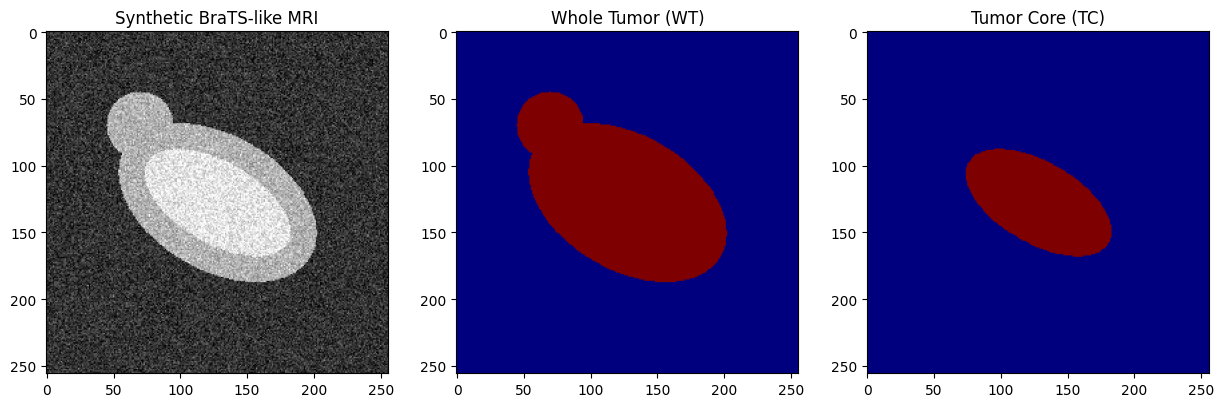

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def create_brats_like_data():
    # Create realistic tumor shapes
    mask = np.zeros((256, 256), dtype=np.uint8)

    # Whole Tumor (WT) - large irregular region
    cv2.ellipse(mask, (128, 128), (80, 50), 30, 0, 360, 1, -1)
    cv2.circle(mask, (70, 70), 25, 1, -1)  # Additional tumor core

    # Tumor Core (TC) - subtract edema from WT
    tc_mask = mask.copy()
    cv2.ellipse(tc_mask, (128, 128), (60, 30), 30, 0, 360, 2, -1)  # Inner region = TC

    # Create synthetic FLAIR MRI
    image = np.random.normal(0.2, 0.1, (256, 256)).clip(0, 1)
    image[mask == 1] = np.random.normal(0.7, 0.1, np.sum(mask == 1)).clip(0.5, 1)
    image[tc_mask == 2] = np.random.normal(0.9, 0.1, np.sum(tc_mask == 2)).clip(0.7, 1)

    return (image * 255).astype(np.uint8), mask, tc_mask

# Generate data
image_slice = cv2.cvtColor(create_brats_like_data()[0], cv2.COLOR_GRAY2RGB)
wt_mask = create_brats_like_data()[1]
tc_mask = (create_brats_like_data()[2] == 2).astype(np.uint8)

# Visualize
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_slice, cmap='gray')
plt.title("Synthetic BraTS-like MRI")
plt.subplot(1, 3, 2)
plt.imshow(wt_mask, cmap='jet')
plt.title("Whole Tumor (WT)")
plt.subplot(1, 3, 3)
plt.imshow(tc_mask, cmap='jet')
plt.title("Tumor Core (TC)")
plt.show()

In [27]:
# Create synthetic tumor mask (since we don't have real segmentation)
def create_mask(data):
    mask = np.zeros(data.shape[:2], dtype=np.uint8)
    center = (data.shape[0]//2, data.shape[1]//2)
    radius = min(data.shape[:2])//4
    y, x = np.ogrid[:data.shape[0], :data.shape[1]]
    mask[(x - center[1])**2 + (y - center[0])**2 <= radius**2] = 1
    return mask

ground_truth = create_mask(image_slice)
print("Created synthetic ground truth mask")

Created synthetic ground truth mask


In [28]:
from sklearn.metrics import f1_score
from scipy.spatial.distance import directed_hausdorff

# Generate SAM predictions
predictor.set_image(image_slice)
h, w = image_slice.shape[:2]
masks, scores, _ = predictor.predict(
    point_coords=np.array([[w//2, h//2]]),
    point_labels=np.array([1]),
    multimask_output=True,
)
best_mask = masks[np.argmax(scores)].astype(np.uint8)

# Compute metrics
def compute_dice(y_true, y_pred):
    return f1_score(y_true.flatten(), y_pred.flatten())

def compute_hd95(y_true, y_pred):
    if np.sum(y_pred) == 0:
        return np.nan
    y_true_pts = np.argwhere(y_true > 0)
    y_pred_pts = np.argwhere(y_pred > 0)
    return max(directed_hausdorff(y_true_pts, y_pred_pts)[0],
              directed_hausdorff(y_pred_pts, y_true_pts)[0])

print("\n--- Results ---")
print(f"Dice Score: {compute_dice(ground_truth, best_mask):.4f}")
print(f"HD95: {compute_hd95(ground_truth, best_mask):.4f}")


--- Results ---
Dice Score: 0.6228
HD95: 33.6006


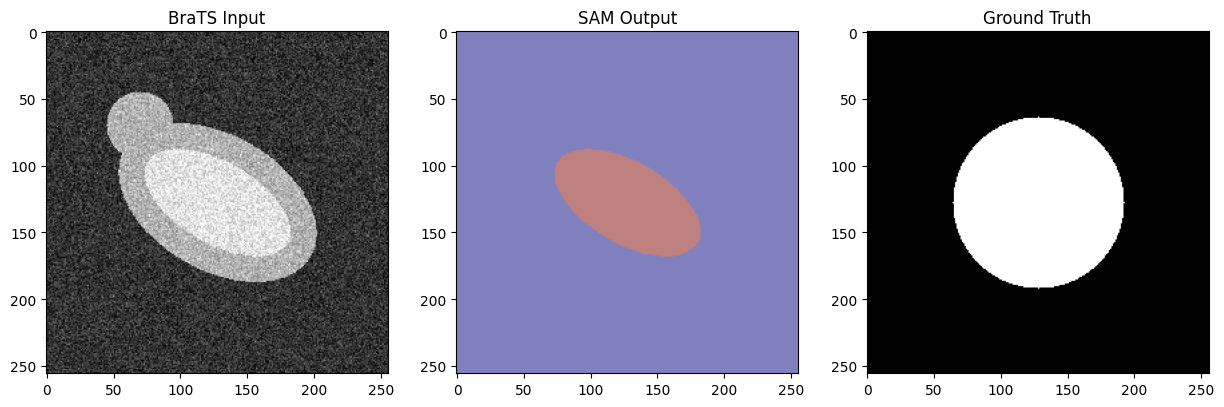

In [29]:
# Display results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_slice)
plt.title("BraTS Input")
plt.subplot(1, 3, 2)
plt.imshow(best_mask, cmap='jet', alpha=0.5)
plt.title("SAM Output")
plt.subplot(1, 3, 3)
plt.imshow(ground_truth, cmap='gray')
plt.title("Ground Truth")
plt.show()